In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# if getting OptionError: "No such keys(s): 'mode.use_inf_as_null'"
# !pip install --upgrade seaborn pandas

import matplotlib as mpl
import os
from glob import glob

from _load_data import * # Getting our specific labels, formatting, and data

# Getting some free samples
results_df.sample()

print(gens)

# Don't change any code below, it may break (probably will) --------------------

['../models/SimplifierTopDown1e-1.py', '../models/SimplifierBottomUpOnlyLast.py', '../models/SimplifierTopDownOnlyLast.py', '../models/SimplifierBottomUp1e-6.py', '../models/SimplifierBottomUp1e-2.py', '../models/SimplifierBottomUp1e-10.py', '../models/SimplifierTopDown1e-0.py', '../models/SimplifierBottomUp1e-0.py', '../models/SimplifierTopDown1e-4.py', '../models/SimplifierTopDown1e-6.py', '../models/Vanilla.py', '../models/SimplifierBottomUp1e-4.py', '../models/SimplifierTopDown.py', '../models/SimplifierTopDown1e-10.py', '../models/SimplifierTopDown1e-2.py', '../models/SimplifierBottomUp1e-1.py', '../models/SimplifierBottomUp.py'] ['Top Down 1e-1', 'Bottom Up (only last)', 'Top Down (only last)', 'Bottom Up 1e-6', 'Bottom Up 1e-2', 'Bottom Up 1e-10', 'Top Down 1e-0', 'Bottom Up 1e-0', 'Top Down 1e-4', 'Top Down 1e-6', 'Without simplify', 'Bottom Up 1e-4', 'Top Down', 'Top Down 1e-10', 'Top Down 1e-2', 'Bottom Up 1e-1', 'Bottom Up']
(539, 14)
['Without simplify' 'Top Down' 'Bottom U

In [2]:
all_data = []
for i, row in results_df.iterrows():
    model, dataset, random_state = row.loc[['model', 'dataset', 'random_state']]

    files = glob(f"{results_path}/{dnames_to_ugly[dataset]}/{nice_to_ugly[model]}/"
                f"*{random_state}_evolution.csv")

    for file in files:
        data = pd.read_csv(file)
        
        for gen in gens:
            try:
                row = data[data['gen']==gen].iloc[0] # should have just 1 row
            except Exception as e:
                print(e)
                # print(file, gen)
                # print(row)
                continue
            
            all_data.append((model, dataset, *row))
            
all_data_df = pd.DataFrame(all_data, 
                           columns=(
                               'model',
                               'dataset',
                               *row.index
                           ))

all_data_df = all_data_df.replace([np.inf, -np.inf], np.nan).dropna()

print(all_data_df.shape)
print(all_data_df['model'].unique())
print(all_data_df['dataset'].unique())
all_data_df.sample(5)

(11143, 27)
['Without simplify' 'Top Down' 'Bottom Up']
['Airfoil' 'Concrete' 'Energy Cooling' 'Energy Heating' 'Housing' 'Yacht']


,model,dataset,gen,evals,best_size,n_simplifications,n_new_hashes,avg train error,avg train size,avg val error,...,std val error,std val size,min train error,min train size,min val error,min val size,max train error,max train size,max val error,max val size
405,Without simplify,Airfoil,70.0,80.0,23.0,0.0,0.0,35.331375,21.8500,40.136059,...,0.124283,2.000625,35.087530,14.0,39.524150,14.0,35.815697,26.0,40.514692,26.0
3347,Bottom Up,Concrete,90.0,80.0,24.0,22.0,53.0,63.519933,23.8125,75.366350,...,4.586450,1.406181,62.433192,12.0,72.927621,12.0,113.839420,25.0,105.277624,25.0
5356,Bottom Up,Energy Cooling,20.0,80.0,15.0,18.0,51.0,16.745717,10.7000,17.761382,...,23.634385,2.575849,12.113523,3.0,13.114545,3.0,209.713281,17.0,215.639426,17.0
1335,Bottom Up,Airfoil,130.0,80.0,41.0,32.0,127.0,77.820844,42.2875,83.389854,...,414.522535,2.495965,13.753488,22.0,18.055257,22.0,3432.067253,45.0,3307.162404,45.0
9553,Without simplify,Yacht,200.0,80.0,21.0,0.0,0.0,1.422226,21.0250,1.089495,...,0.000987,0.156125,1.421638,21.0,1.089384,21.0,1.468701,22.0,1.098268,22.0


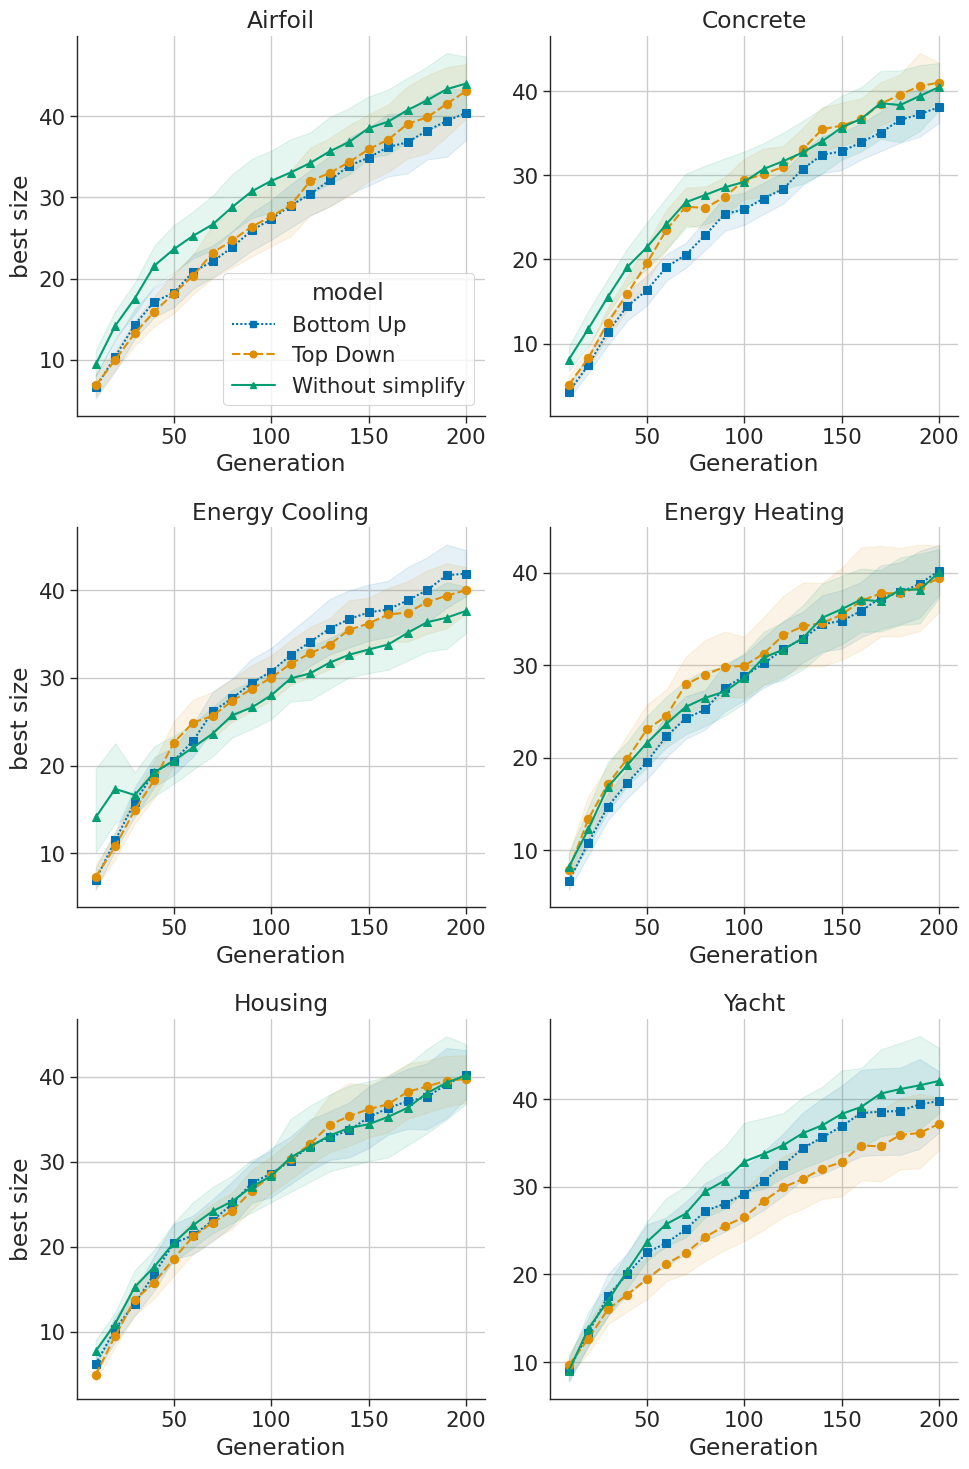

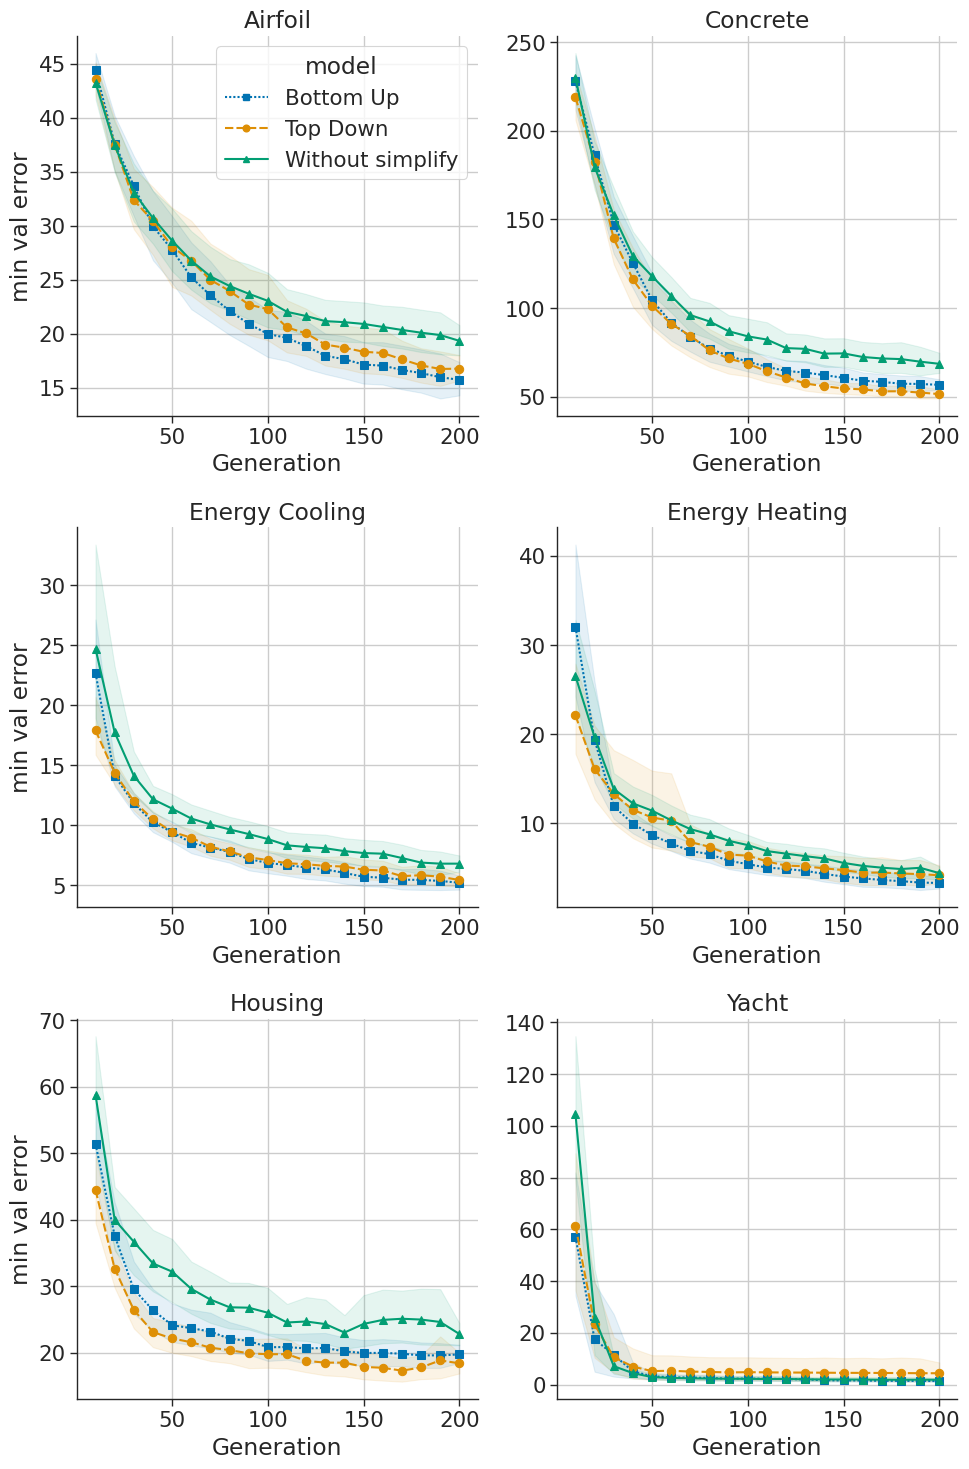

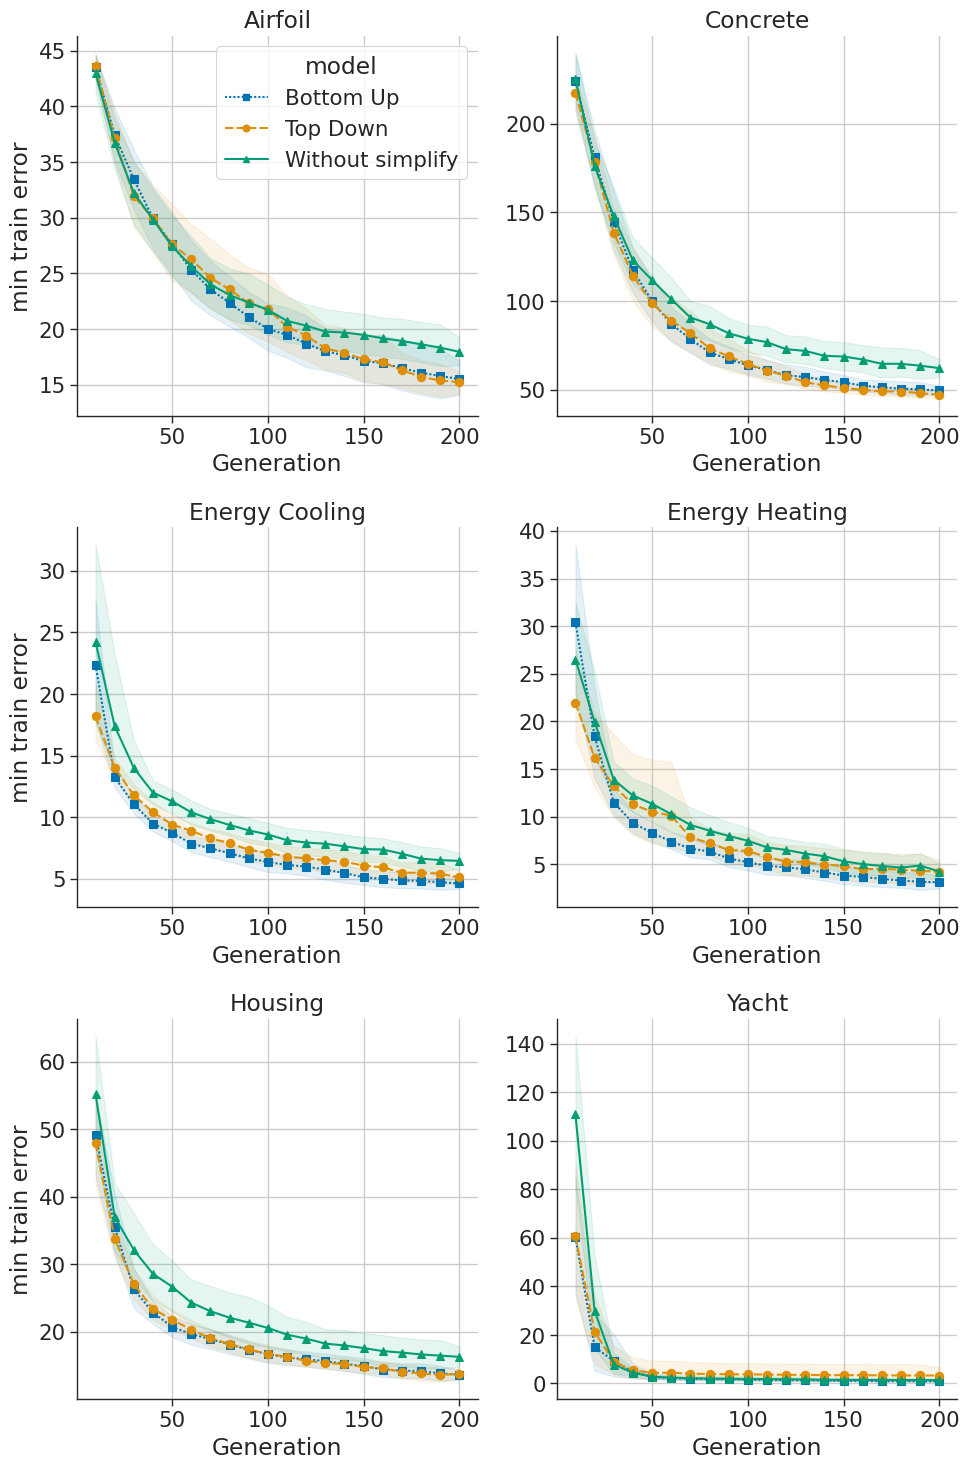

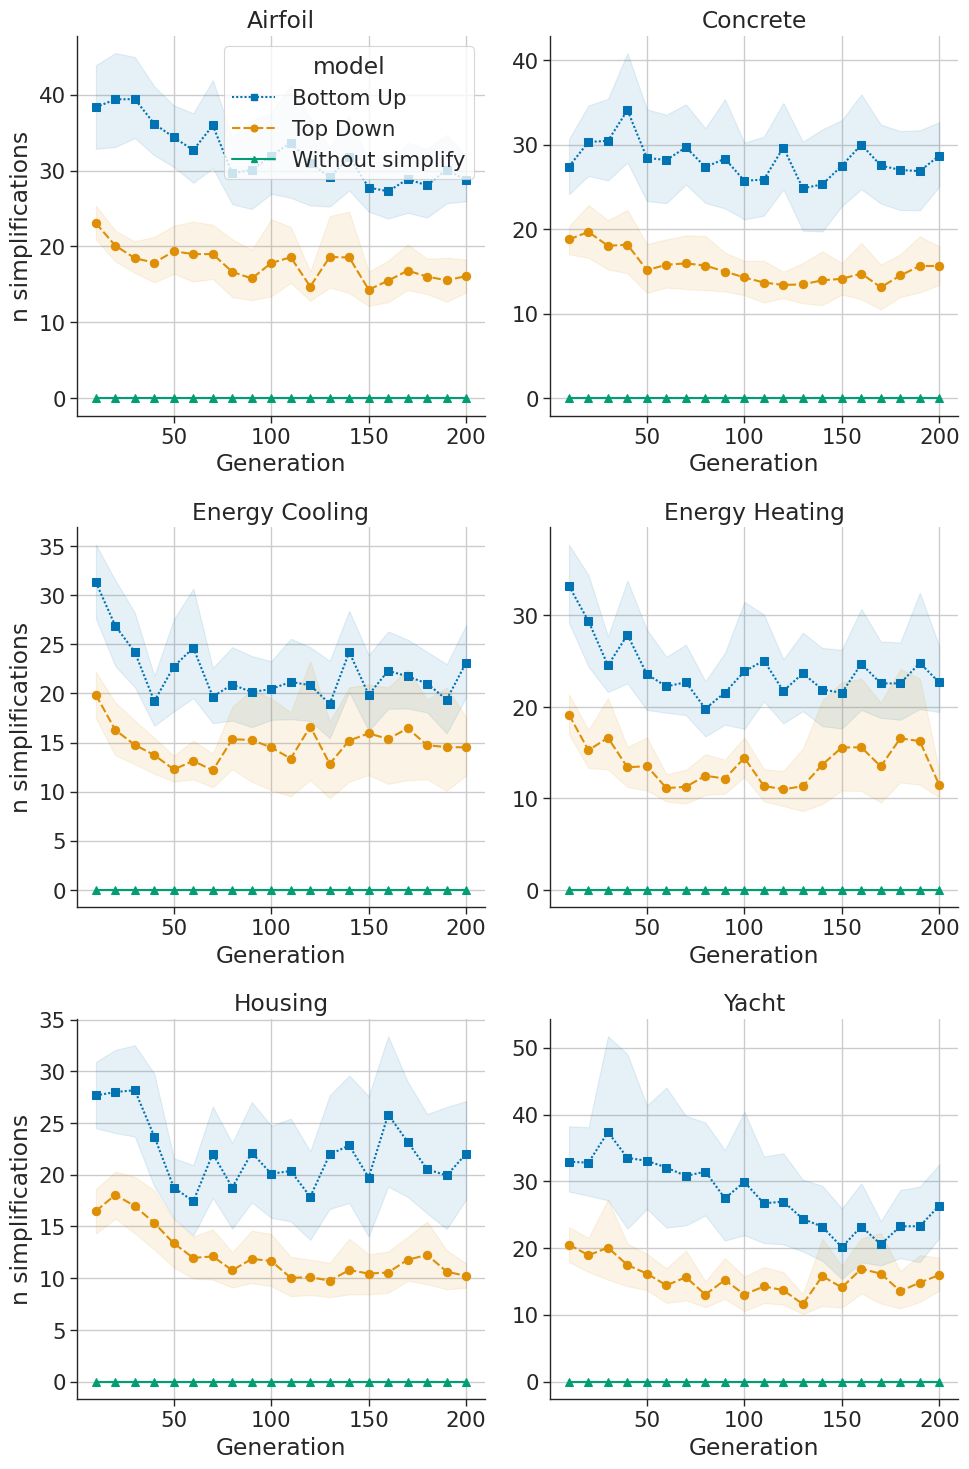

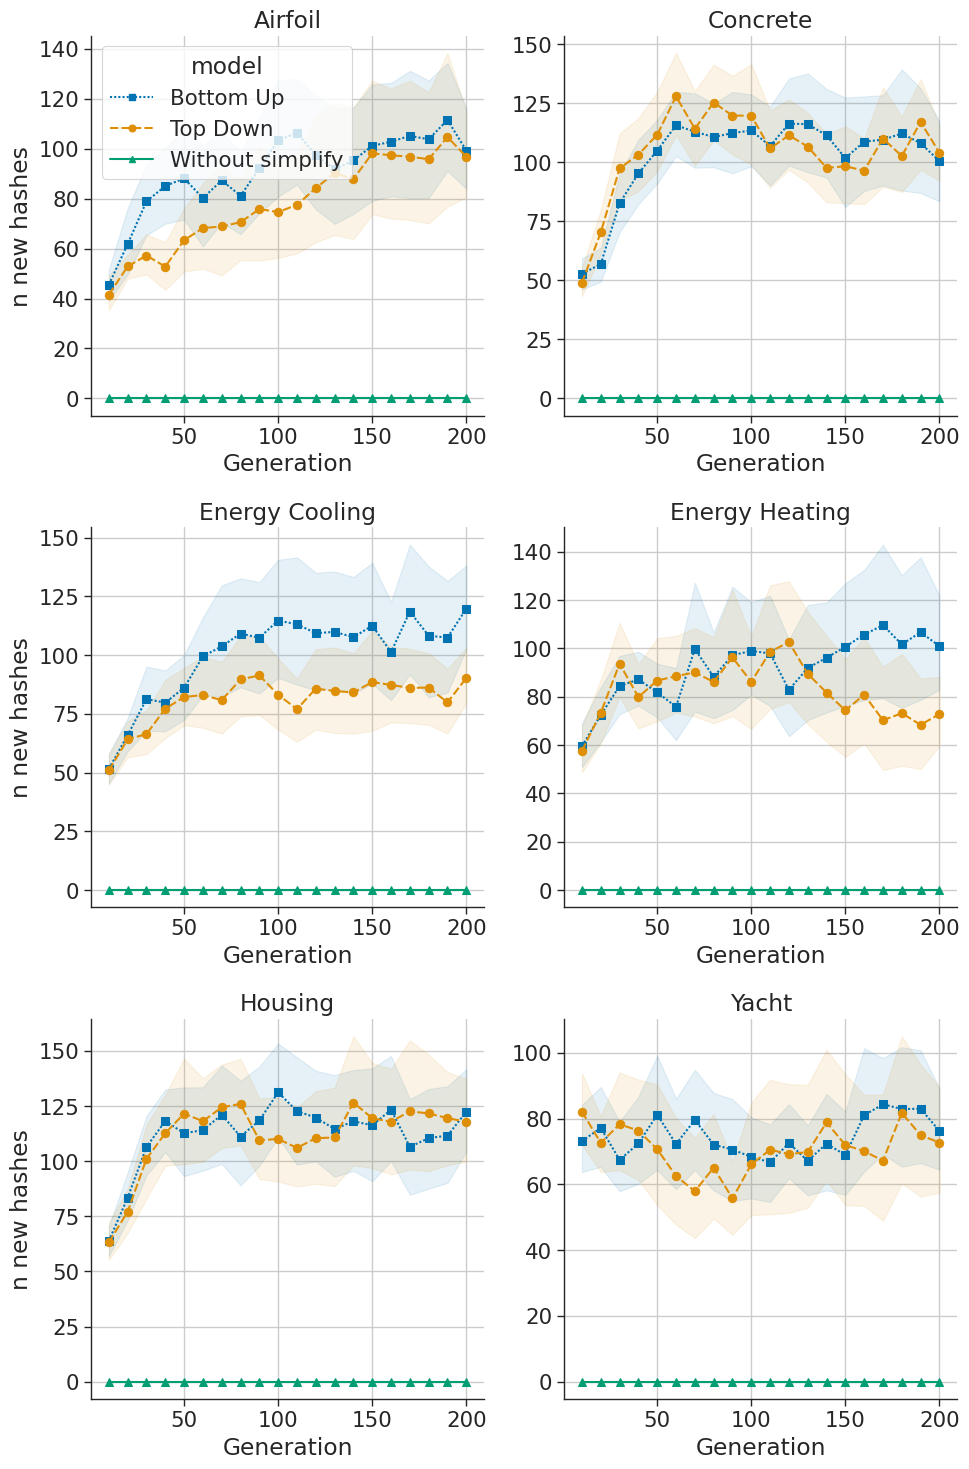

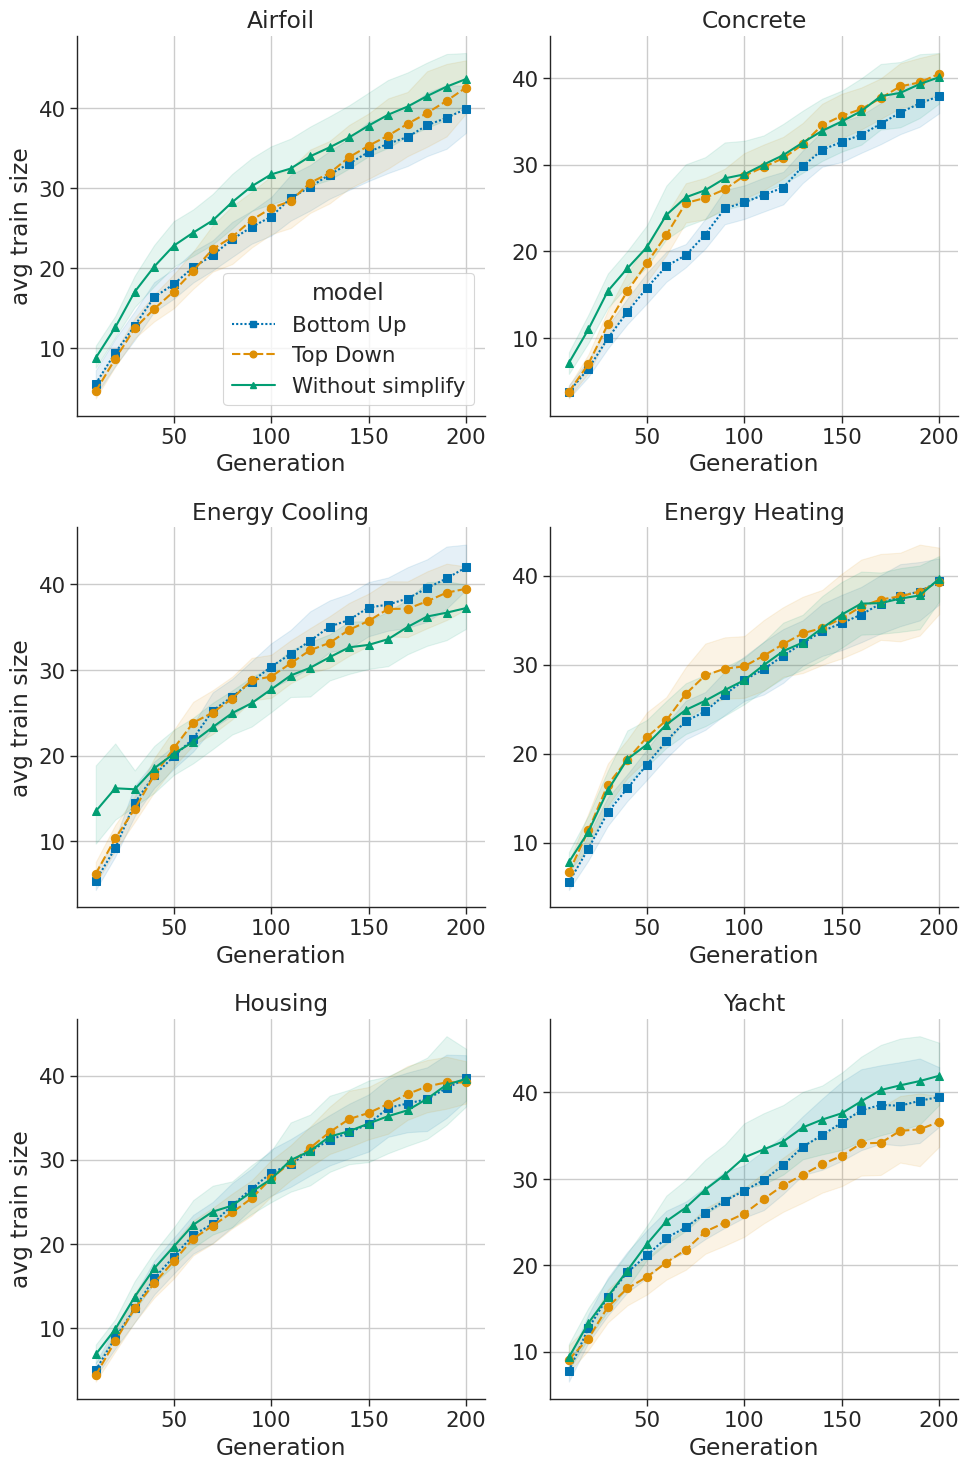

In [3]:
for col in [
    'best_size','min val error', 'min train error',
    'n_simplifications', 'n_new_hashes','avg train size',
    #'med train error','med val error',
]:
    
    # about errors: https://seaborn.pydata.org/tutorial/error_bars.html
    g = sns.relplot(
        data=all_data_df,
        x="gen", y=col, col="dataset", hue="model",
        style="model", col_wrap=col_wrap, markers=marker_choice, markeredgecolor=None, 
        kind="line", facet_kws={'sharey': False, 'sharex': False, 'legend_out':False}, 
        hue_order = order, estimator=np.mean, markersize=6,
        
        #err_style='bars', err_kws={'capsize':0.0, 'linewidth':0.0},
        #err_style='bars', err_kws={'capsize':2.0, 'linewidth':0.5}, # 2.0, 0.5
        err_style='band', err_kws={'alpha':0.1},
    )
    g.set_titles("{col_name}")

    for (ds, plot_ax) in g._axes_dict.items():
        plot_ax.grid(which='major', axis='both', linewidth=1)
        plot_ax.set_xlabel("Generation")
        plot_ax.set_ylabel(plot_ax.get_ylabel().replace('_', ' '))

    if False: # use log scale
        #g.set(xscale="log")
        g.set(yscale="log")

    plt.tight_layout()
    plt.savefig(f"../paper/figs/{col}.pdf")
    plt.savefig(f"../paper/figs/{col}.png")
    plt.show()